### The purpose of this exercise is to gain some hands on experience in programming with a real geochemical data set from the Andeas (source: GEOROC Database). I will be referring to my notes taken during the online courses that I took alongside documentation.

### The main question that I would like to explore is: can machine learning predict the mode of subduction based on geochemical input?

### Hopefully, the results will be interesting and reveal previously unseen relationships

# Exploratory Data Analysis - Part 1

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib

In [17]:
df = pd.read_csv("Combined_Data.csv")

In [18]:
df.head()

,Mode,SIO2(WT%),TIO2(WT%),B2O3(WT%),AL2O3(WT%),CR2O3(WT%),FE2O3(WT%),FEO(WT%),FEOT(WT%),CAO(WT%),...,HE4_HE3,HE4_HE3(R/,K40_AR40,AR40_K40,Ba/Th,La (PM),Sm (PM),La/Sm (PM),Crustal Thickness,Sr/Y
0,Flat,43.81,1.480,NaN,15.02,NaN,NaN,NaN,9.370,11.920,...,NaN,NaN,NaN,NaN,104.617642,46.362929,15.773698,2.939255,36.840000,46.898527
1,Flat,44.10,2.140,NaN,23.52,NaN,NaN,NaN,7.160,4.250,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,47.080002,NaN
2,Flat,44.48,3.440,NaN,15.92,NaN,4.67,7.5,NaN,9.360,...,NaN,NaN,NaN,NaN,NaN,756.914119,0.000000,NaN,57.669998,28.903226
3,Flat,44.50,1.640,NaN,16.84,NaN,NaN,NaN,9.940,11.550,...,NaN,NaN,NaN,NaN,167.539682,144.832605,35.135135,4.122159,44.000000,73.577465
4,Flat,44.50,1.267,NaN,11.88,NaN,NaN,NaN,9.583,7.162,...,NaN,NaN,NaN,NaN,129.613438,19.957701,8.918950,2.237674,48.580002,25.167002


In [19]:
df.info

<bound method DataFrame.info of         Mode  SIO2(WT%)  TIO2(WT%)  B2O3(WT%)  AL2O3(WT%)  CR2O3(WT%)  \
0       Flat      43.81      1.480        NaN       15.02         NaN   
1       Flat      44.10      2.140        NaN       23.52         NaN   
2       Flat      44.48      3.440        NaN       15.92         NaN   
3       Flat      44.50      1.640        NaN       16.84         NaN   
4       Flat      44.50      1.267        NaN       11.88         NaN   
...      ...        ...        ...        ...         ...         ...   
4110  Normal      78.67      0.120        NaN       12.20         NaN   
4111  Normal      78.93      0.290        NaN        9.79         NaN   
4112  Normal      79.55      0.085        NaN        8.08         NaN   
4113  Normal      80.00      0.104        NaN        8.90         NaN   
4114  Normal      84.06      0.086        NaN        9.47         NaN   

      FE2O3(WT%)  FEO(WT%)  FEOT(WT%)  CAO(WT%)  ...  HE4_HE3  HE4_HE3(R/  \
0            N

<AxesSubplot:>

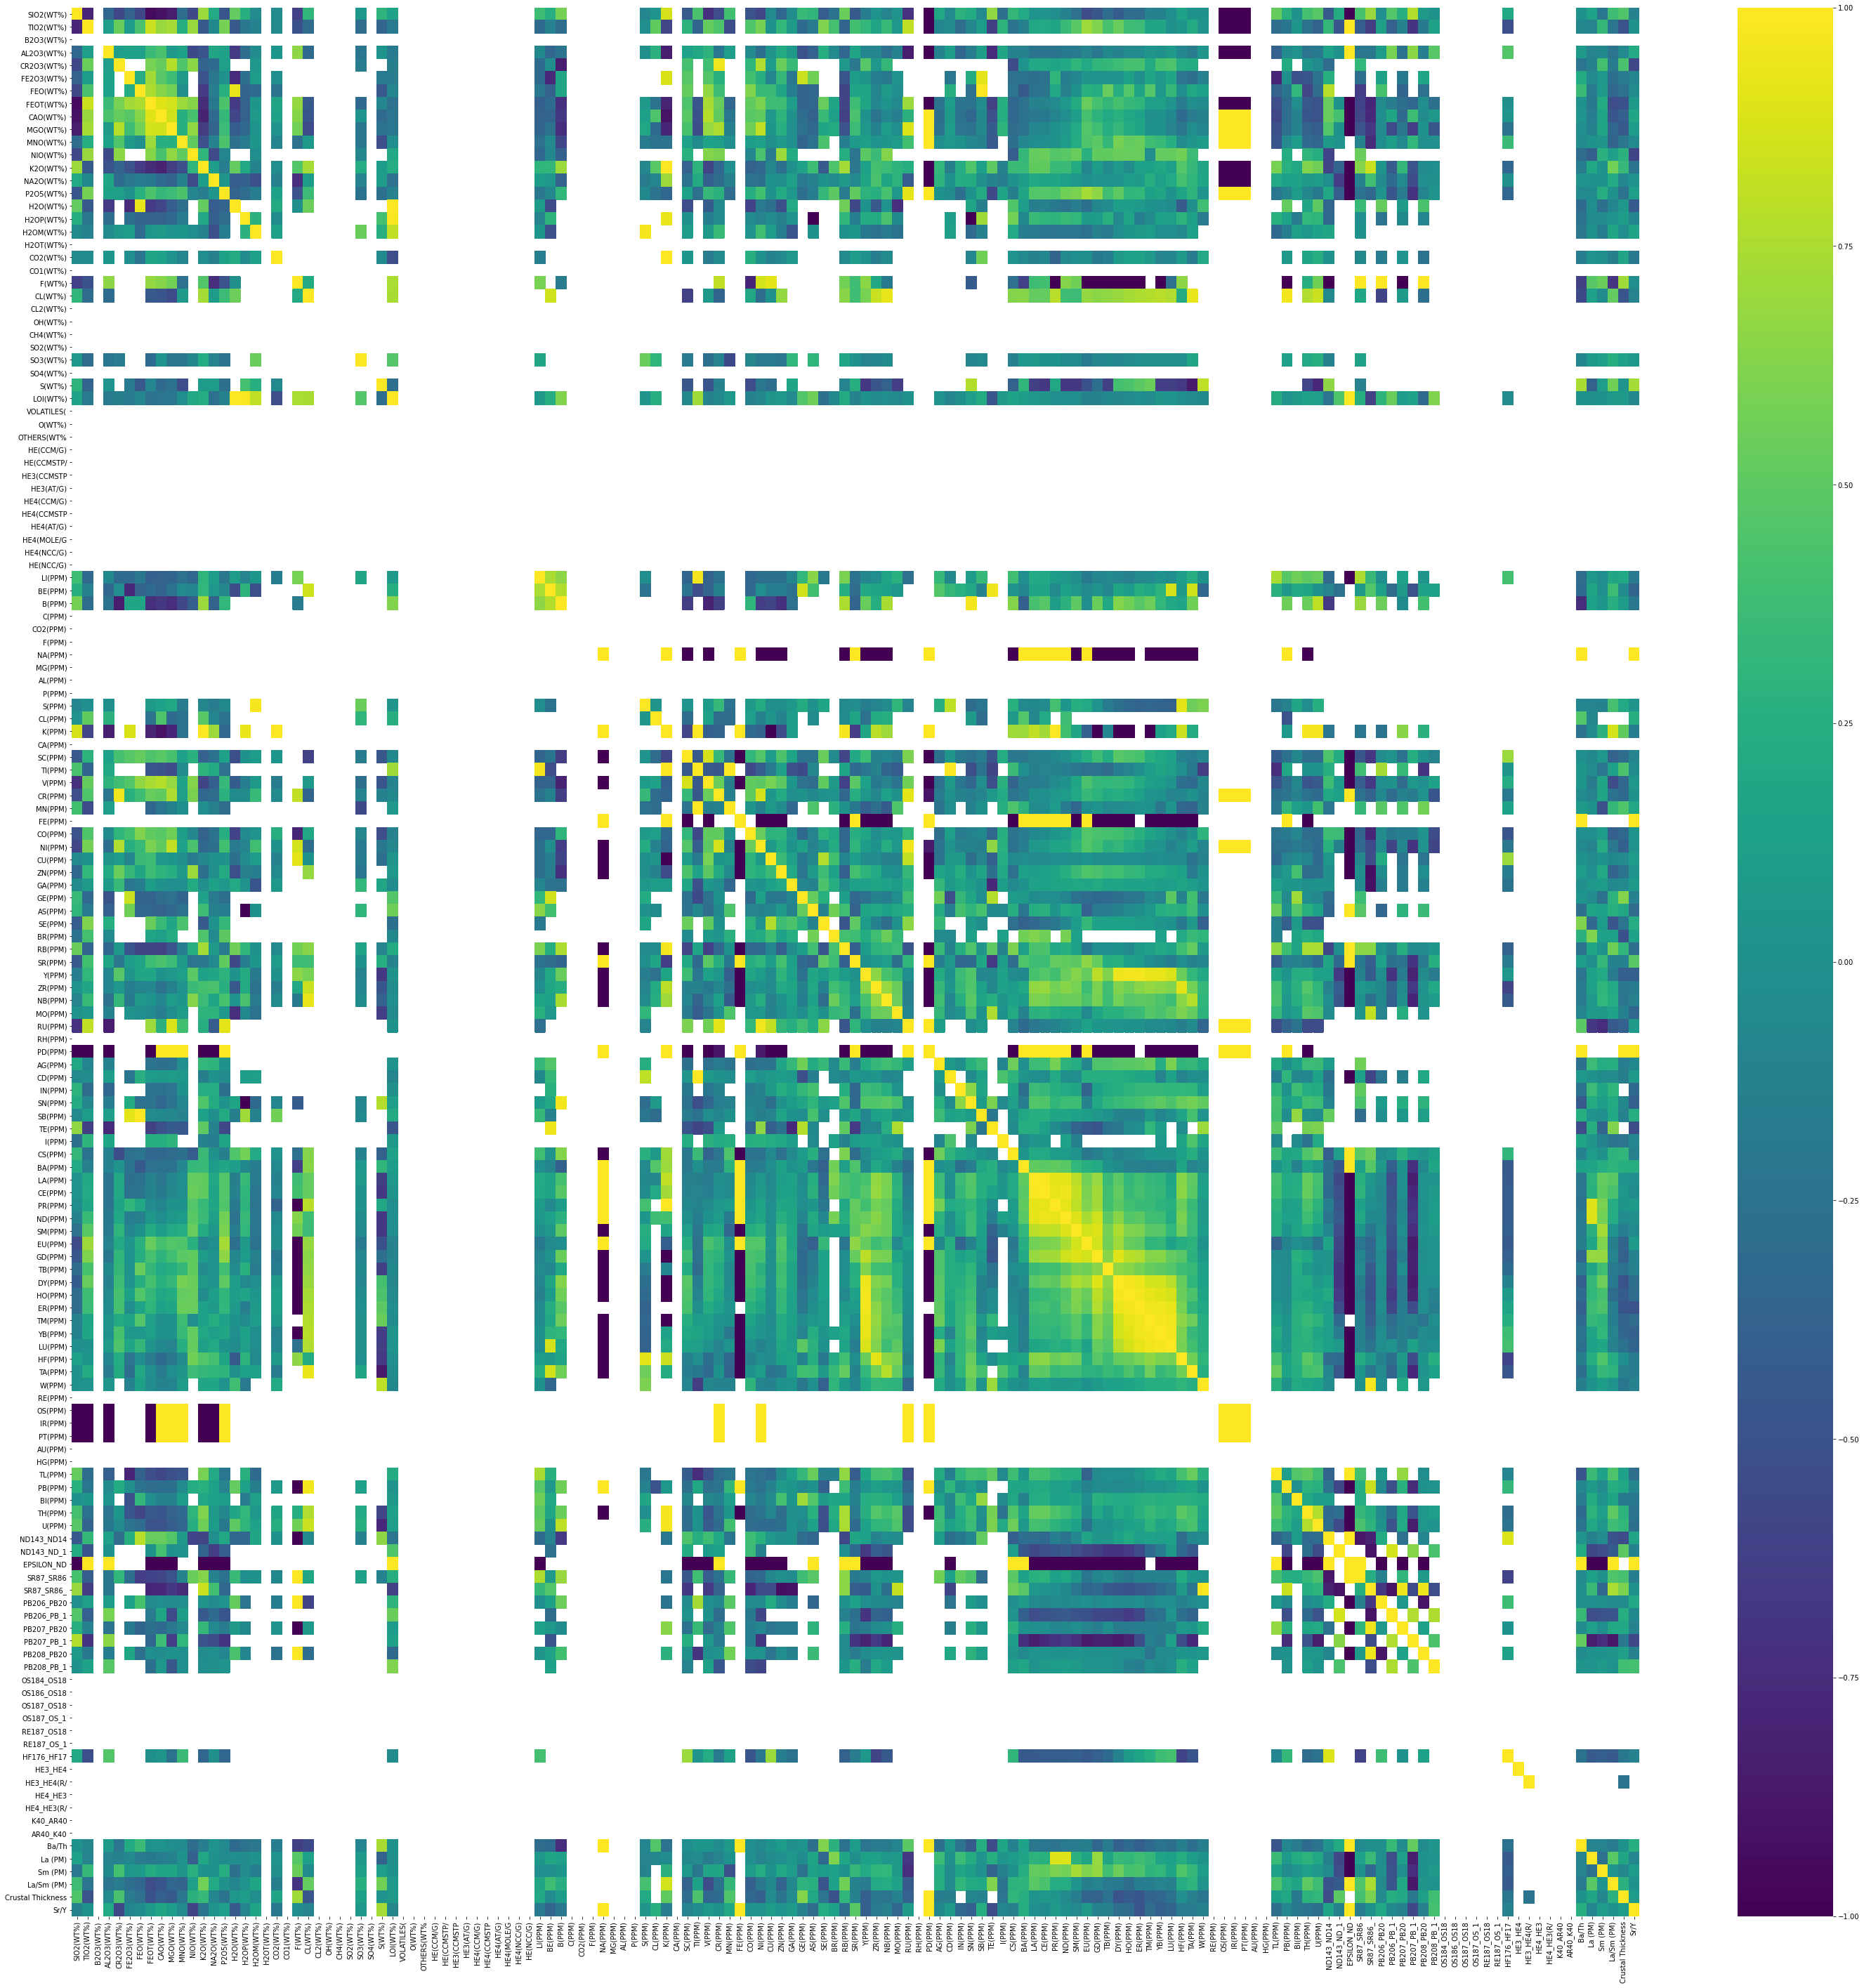

In [20]:
plt.figure(figsize=(50,50))
sb.heatmap(df.corr(), cmap="viridis")

# The white rows are associated with data columns that have very few data points

## One Method of Visualizing High Dimensional Data: t-Distributed Stochastic Neighbor Embedding

In [21]:
df_r = pd.read_csv("Combined_Data_Reduced.csv") # Dropped na values whihc is not ideal
df_numeric = df_r.drop('Mode', axis=1)
df_numeric = df_numeric.dropna()
print(df_numeric.head())

# fit and transform the t-SNE model on the numeric dataset
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300, learning_rate=200)
tsne_results = tsne.fit_transform(df_numeric)
print(tsne_results.shape)
tsne.kl_divergence_

    SIO2(WT%)  TIO2(WT%)  AL2O3(WT%)  FEOT(WT%)  CAO(WT%)  MGO(WT%)  MNO(WT%)  \
0       43.81       1.48       15.02       9.37     11.92      9.62      0.17   
7       44.90       1.63       14.39      10.01     10.01     10.00      0.18   
11      45.03       1.79       15.95      10.18     11.50      6.69      0.16   
19      45.50       1.44       15.74       9.42     10.47      9.46      0.17   
28      45.70       2.52       15.44      10.23      9.87      6.41      0.15   

    K2O(WT%)  NA2O(WT%)  P2O5(WT%)  ...  ND143_ND14  SR87_SR86  PB206_PB20  \
0       1.40       3.02       0.68  ...    0.512816   0.703948   18.566000   
7       1.49       2.97       0.74  ...    0.512820   0.703865   18.583000   
11      0.92       3.05       0.53  ...    0.512786   0.704054   18.460000   
19      1.48       3.55       0.58  ...    0.512799   0.703820   18.594000   
28      1.61       3.90       0.67  ...    0.512845   0.703550   18.347147   

    PB207_PB20  PB208_PB20       Ba/Th    La

3.2103629112243652

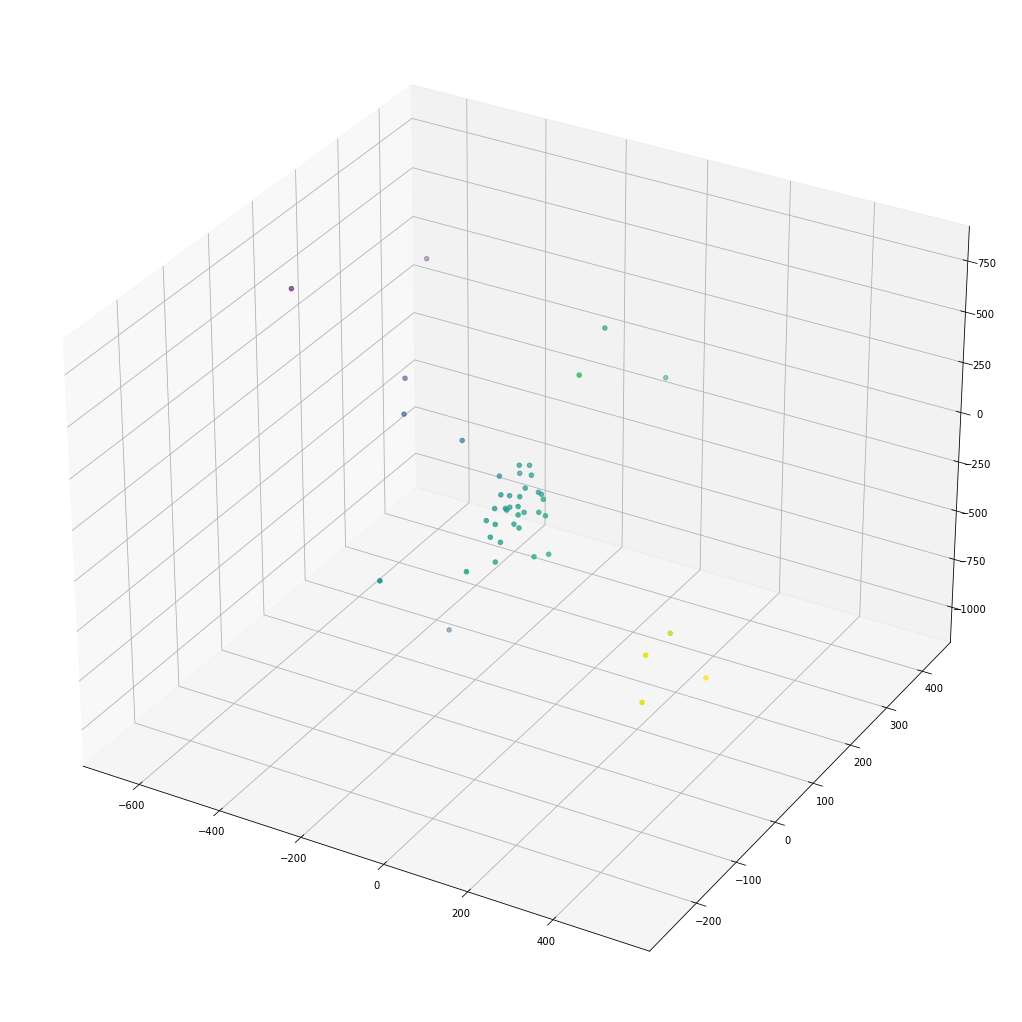

In [22]:
df_numeric['tsne_x'] = tsne_results[:, 0]
df_numeric['tsne_y'] = tsne_results[:, 1]
df_numeric['tsne_z'] = tsne_results[:, 2]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,14))
ax = Axes3D(fig)
x_ax = df_numeric['tsne_x']
y_ax = df_numeric['tsne_y']
z_ax = df_numeric['tsne_z']
ax.scatter(x_ax, y_ax, z_ax, c=x_ax, marker='o')

### As high dimensional data is being used, in-depth exploratory data analysis will be resumed later based on the most important features indicated by ML.

## Boosted Trees will be used. This was chosen as it is able to handle empty values. Removing rows with empty values is not an option as it will lead to significant loss of data. Also, using XGBoost avoids one-hot encoding.

### Process will be repeated to assess the effect of the removal of the weakest predictors

# Boosted Trees

In [23]:
# X will contain the features; Y will be the variable that we want to predict
X = df.drop('Mode', axis=1)
y = df[['Mode']].astype('category')
y=y.replace(to_replace="Flat",value=0)
y=y.replace(to_replace="Normal",value=1)
y = y['Mode'].astype(str).astype(int) # To make life easier, I will replace str with int

# Let's allocate 30% of our data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)
clf=XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=1000, objective='binary:logistic', booster='gbtree')
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
pd.DataFrame(clf.feature_importances_.reshape(1, -1), columns=X.columns)

,SIO2(WT%),TIO2(WT%),B2O3(WT%),AL2O3(WT%),CR2O3(WT%),FE2O3(WT%),FEO(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),...,HE4_HE3,HE4_HE3(R/,K40_AR40,AR40_K40,Ba/Th,La (PM),Sm (PM),La/Sm (PM),Crustal Thickness,Sr/Y
0,0.003118,0.012066,0.0,0.00311,0.024655,0.017097,0.00276,0.00259,0.003053,0.001051,...,0.0,0.0,0.0,0.0,0.001217,0.002176,0.002009,0.005185,0.015377,0.01514


In [26]:
params = {"objective": "multi:softprob", "tree_method": "gpu_hist", "num_class": 2}
n = 1000

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

In [27]:
results.keys()

Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',
       'train-auc-std', 'train-merror-mean', 'train-merror-std',
       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',
       'test-auc-std', 'test-merror-mean', 'test-merror-std'],
      dtype='object')

In [28]:
results['test-merror-mean']

0      0.132639
1      0.093750
2      0.087153
3      0.069792
4      0.058333
         ...   
995    0.018056
996    0.018056
997    0.018056
998    0.018056
999    0.018056
Name: test-merror-mean, Length: 1000, dtype: float64

Text(0.5, 0, 'Round')

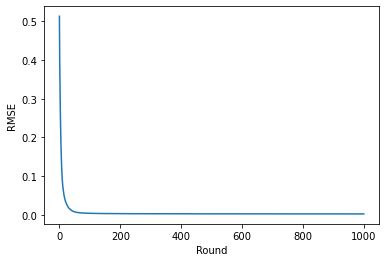

In [29]:
plt.plot(results.iloc[:,0])
plt.ylabel("RMSE")
plt.xlabel('Round')

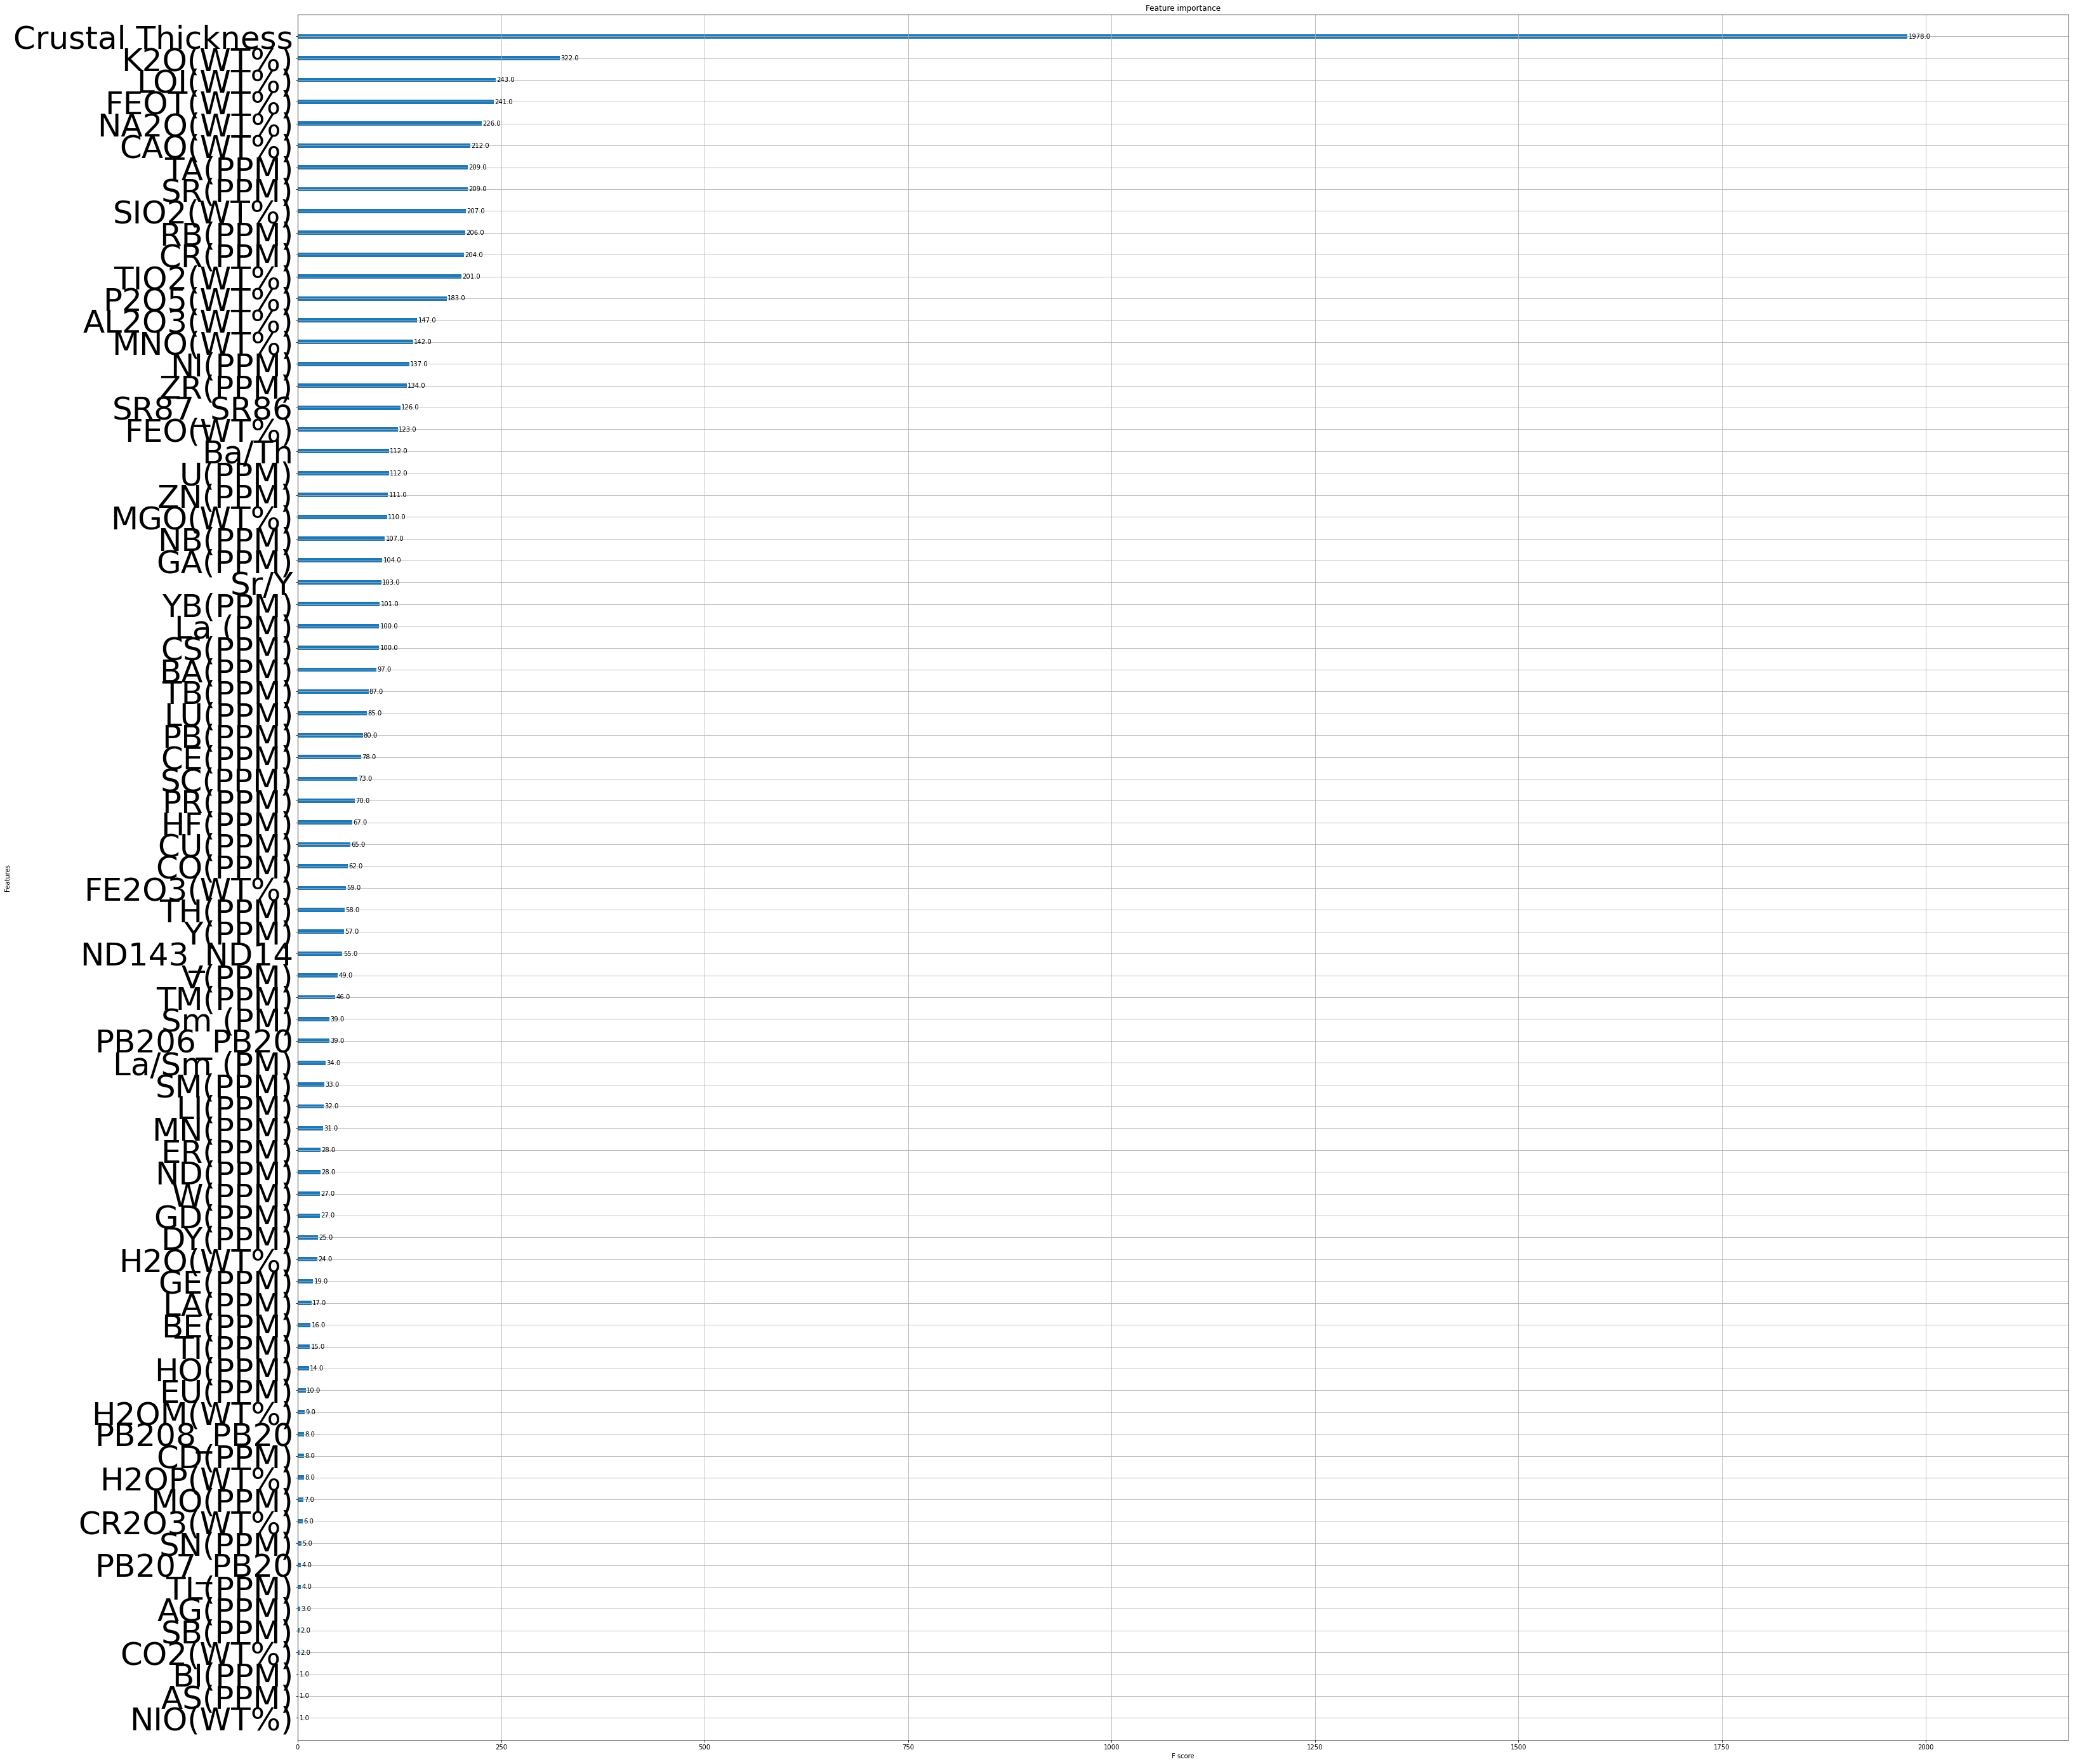

In [62]:
from xgboost import plot_importance
# plot feature importance
plot_importance(clf)
plt.rcParams["figure.figsize"] = (75,50)
matplotlib.rc('ytick', labelsize=50) 
plt.show()

In [31]:
predicted = clf.predict(X_test)

In [32]:
yl = y_test
len(yl)

1235

In [33]:
# How do we compare the prediction to actual results?
# One method is to convert both inputs to a list and compare their cosine similarities

from collections import Counter
import math
counterA = Counter(list(predicted))
counterB = Counter(yl)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(counterA, counterB) # Very high cosine similarity

0.9999393745738594